# Flight Price Prediction

This python notebook uses supervised machine learning libraries and tools for to build a machine learning model for predicting the fare of Airline tickets

The following approach would be taken
1. Problem Definition.
2. Data Collection.
3. Evaluation.
4. Features Depiction and Generation.
5. Modelling.
6. Experimentation and Improvement.

## Problem Definition:
> Predicting the fare of Airline tickets

## Data Collection:
The dataset is from the Udemy Course - Data Science Real World Projects.

## Evaluation:
> If a >95% accuracy is attained at predicting whether or not the diagnosis is benign or malignant, then this project is worth giving a shot.

## Features Depiction and Generation:
Data Dictionary

Number of Observations: 10,684
Number of Attributes: 10 predictive attributes and the target class - Price
10 features are used, examples include:
- Date of Journey
- Source
- Destination
- Route
- Departure Time
- Arrival Time
- Duration
- Total Stops
- Additional Information

In [1]:
#Import tools -> EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Deal with caveats
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

## Load data
Since data is in form of excel file we have to use pandas read_excel to load the data

In [5]:
train_data=pd.read_excel('Data_Train.xlsx')

In [6]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [7]:
train_data.tail(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Data Exploration (EDA - exploratory data analysis)

The goal is to find out more about the data and become a subject matter on the dataset being worked with.

1. What question(s) is being solved?
2. Kinds of data types?
3. What's missing from the data and how to resolve that?
    If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well
4. Outliers?
5. Feature manipulation to get more out of the data

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

> Dataset has less missing values,I can directly drop these

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

> From description we can see that Date_of_Journey is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,as our model will not be able to understand string values,only Time-stamp. </br>
    For this we require pandas to_datetime to convert object data type to datetime dtype.

    dt.day method will extract only day of that date
    dt.month method will extract only month of that date

In [13]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])
    

In [14]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [16]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day

In [18]:
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [19]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-13 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-13 05:50:00,2021-08-13 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [20]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [21]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-13 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-13 05:50:00,2021-08-13 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [22]:
'''
Define function to extract hour(s) from column,
Create a new column with 'hour' attached to the name.
'''
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [23]:
'''
Define function to extract minute(s) from column,
Create a new column with 'minute' attached to the name.
'''
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [24]:
# Function to drop column that has been pre-processed
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [25]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(train_data,'Dep_Time')

In [26]:
# Extracting Minutes
extract_min(train_data,'Dep_Time')

In [27]:
# # Now we can drop Dep_Time as it has been pre-processed
drop_column(train_data,'Dep_Time')

In [28]:
train_data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50


In [29]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(train_data,'Arrival_Time')

# Extracting minutes
extract_min(train_data,'Arrival_Time')

# Now we can drop Arrival_Time as it has been pre-processed
drop_column(train_data,'Arrival_Time')

In [30]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [31]:
'''
Lets Apply pre-processing on duration column,
This will separate the Duration hours and minute from duration column
'''
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
    

In [32]:
train_data['Duration']=duration

In [33]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [34]:
# Define funtion to extract hour(s) from datetime column
def hour(x):
    return x.split(' ')[0][0:-1]

In [35]:
# Define funtion to extract min(s) from datetime column
def min(x):
    return x.split(' ')[1][0:-1]

In [36]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [37]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [38]:
# Now we can drop Duration as it has been pre-processed
train_data.drop('Duration',axis=1,inplace=True)

In [39]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [40]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [41]:
# Convert duration_hours and duration_mins to integers
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [42]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [43]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [44]:
# Get categorical columns
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [45]:
# Get numerical columns
num_col=[col for col in train_data.columns if train_data[col].dtype!='O']
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Handling Categorical Data
We are using 2 main Encoding Techniques to convert Categorical data into some numerical format

    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [46]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [47]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

[Text(0.5, 1.0, 'Airline vs Price Analysis')]

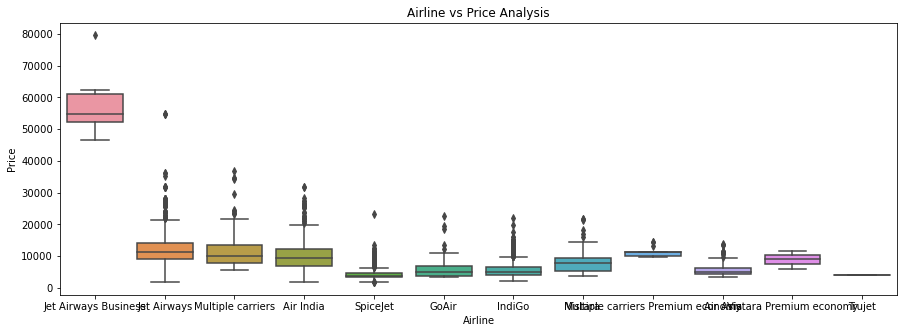

In [48]:
# Airline vs Price Analysis
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False)).set(title='Airline vs Price Analysis')

> From graph we can see that Jet Airways Business have the highest Price, Apart from the first Airline almost all are having similar median

In [49]:
len(categorical['Airline'].unique())

12

In [50]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


[Text(0.5, 1.0, 'Total_Stops vs Price Analysis')]

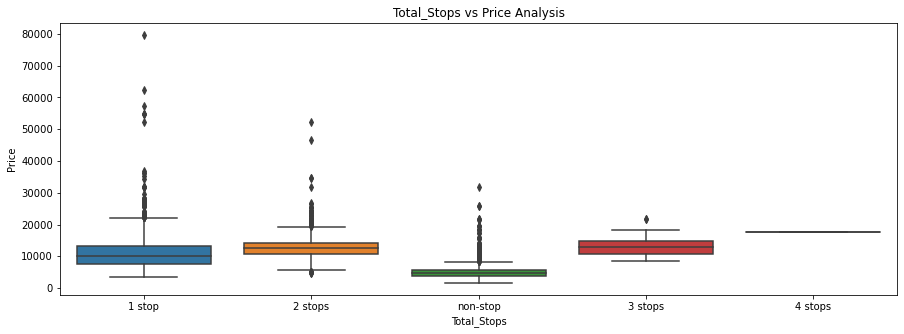

In [51]:
# Total_Stops vs Price Analysis
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False)).set(title='Total_Stops vs Price Analysis')

In [52]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x360 with 0 Axes>

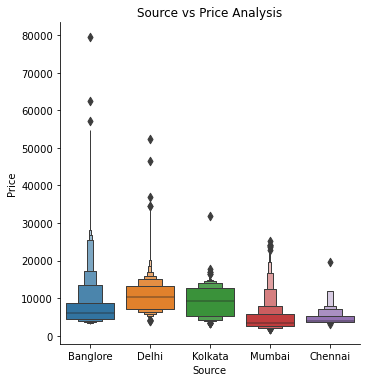

In [53]:
# Source vs Price Analysis
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen').set(title='Source vs Price Analysis')

In [54]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [55]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Figure size 1080x360 with 0 Axes>

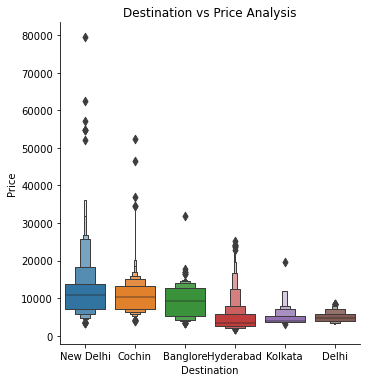

In [56]:
# Destination vs Price Analysis
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False),kind='boxen').set(title='Destination vs Price Analysis')

In [57]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [58]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [59]:
# Separate routes into different individual columns
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [60]:
categorical.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN


In [61]:
# Replace NaN with None since their is no route there
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [62]:
categorical.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None


In [63]:
# Get the amount of categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



> There are a lot of features in Route , one hot encoding will not be a better option lets appply Label Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [65]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [66]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [67]:
categorical.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5


In [68]:
'''
Additional_Info contains almost 80% no_info,so we can drop this column
We can drop Route as well as we have pre-processed that column
'''
    
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

In [69]:
categorical.head(3)

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5


In [70]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [71]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [72]:
'''
As this is case of Ordinal Categorical type we perform LabelEncoder
Here Values are assigned with corresponding key
'''

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [73]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [74]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [75]:
train_data[num_col]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [76]:
# Concatenate dataframe --> categorical + Airline + Source + Destination
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[num_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [77]:
# Drop selected columns because they have been OneHot Encoded
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [78]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [79]:
# Pandas head() clips the dataset since they are too long, cater for that with pandas set_option()
pd.set_option('display.max_columns',35)

In [80]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [81]:
# View all Updated columns
data_train.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

### Outlier Detection

In [82]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

<Figure size 2160x1440 with 0 Axes>

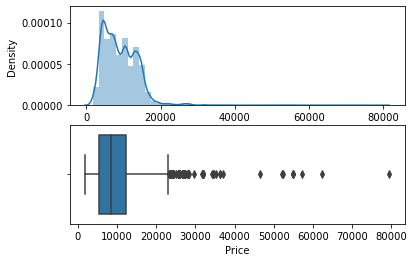

In [83]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

> From the graph, we can visualize that features with price over 40,000 could be considered outliers as they are distanced from the distribution.

In [84]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

<Figure size 2160x1440 with 0 Axes>

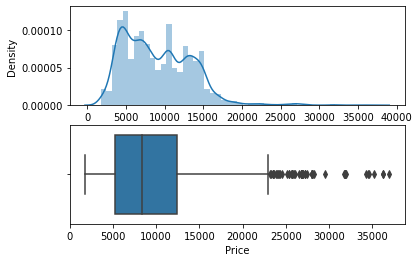

In [85]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

In [87]:
# Split train data into target and features
X=data_train.drop('Price',axis=1)
y=data_train['Price']

X, y

(       Total_Stops  Route_1  Route_2  Route_3  Route_4  Route_5  Air India  \
 0                0        0       13       29       13        5          0   
 1                2        2       25        1        3        5          1   
 2                2        3       32        4        5        5          0   
 3                1        2       34        3       13        5          0   
 4                1        0       34        8       13        5          0   
 ...            ...      ...      ...      ...      ...      ...        ...   
 10678            0        2        5       29       13        5          0   
 10679            0        2        5       29       13        5          1   
 10680            0        0       13       29       13        5          0   
 10681            0        0       13       29       13        5          0   
 10682            2        3       16        4        5        5          1   
 
        GoAir  IndiGo  Jet Airways  Jet Airways Bu

In [93]:
print(type(X))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [94]:
X.isnull().sum()

Total_Stops                          0
Route_1                              0
Route_2                              0
Route_3                              0
Route_4                              0
Route_5                              0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                

In [95]:
y.isnull().sum()

0

> No missing value present in data, we can definitely go ahead with Feature Selection

#### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
#### Why to apply Feature Selection?
    To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

In [89]:
X.dtypes

Total_Stops                          int64
Route_1                              int32
Route_2                              int32
Route_3                              int32
Route_4                              int32
Route_5                              int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin                               uint8
Delhi                                uint8
Hyderabad  

In [90]:
# Using mutual information scores or matrix to get to know about the relationship between all features.
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([2.17251244e+00, 2.10003186e+00, 2.81014661e+00, 2.28202472e+00,
       1.45221293e+00, 7.16650918e-01, 7.64925588e-01, 8.89268369e-02,
       6.73442441e-01, 9.20438586e-01, 4.54593238e-03, 5.77613013e-01,
       4.67669875e-03, 3.27388907e-01, 1.11179548e-02, 2.31942082e-01,
       1.61876153e-03, 1.74237116e-01, 1.57150464e+00, 8.91605987e-01,
       2.95644205e-01, 1.55545060e+00, 4.07545848e-01, 2.96185728e-01,
       1.77958117e-01, 3.90033125e-01, 1.08041217e+00, 8.81233923e-01,
       1.42781826e+00, 1.21269142e+00, 1.83321400e+00, 1.53979992e+00,
       1.78689076e+00, 1.08951495e+00])

In [91]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.143063
Route_1,2.063921
Route_2,2.801038
Route_3,2.293028
Route_4,1.521522
Route_5,0.762207
Air India,0.782922
GoAir,0.102798
IndiGo,0.664280
Jet Airways,0.929562


In [82]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.815119
Route_3,2.337620
Total_Stops,2.194628
Route_1,2.058102
Arrival_hour,1.855666
Duration_hours,1.776158
Delhi,1.567707
Cochin,1.542882
Arrival_min,1.529901
Route_4,1.455257


## Modelling

In [92]:
# Import tools --> Model evaluation libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split into train & test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [102]:
# Dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print(ml_model)
    print('\n')
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        '''
        Dump your model using pickle so that we will re-use
        '''
#         file=open('E:\End-2-end Projects\Flight_Price/flight_model.pkl','wb')
        file=open('flight_model.pkl','wb')
        pickle.dump(model,file)

In [100]:
#Import tools --> Modelling libraries for classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Finding optimal number of neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}

KNeighborsRegressor()


Training score : 0.7777489804890609
predictions are: 
 [10303.2 11083.4 10748.2 ...  3751.4 11955.6  6268. ]


r2 score: 0.650161137091977
MAE: 1752.012072999532
MSE: 6858448.113373889
RMSE: 2618.863897451314


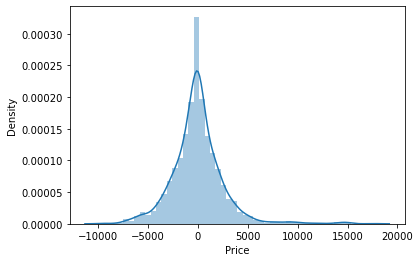

In [111]:
optimal_neighbor = 5

predict(KNeighborsRegressor(n_neighbors=optimal_neighbor), 0)

RandomForestRegressor()


Training score : 0.9534649309144544
predictions are: 
 [10834.23083333 12137.56        6373.975      ...  3654.91466667
 11235.86416667  6727.09      ]


r2 score: 0.8237309237846718
MAE: 1159.5864347342072
MSE: 3455683.2913472485
RMSE: 1858.946823162849


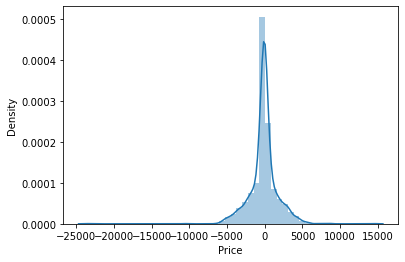

In [108]:
predict(RandomForestRegressor(),0)

DecisionTreeRegressor()


Training score : 0.9674351978853054
predictions are: 
 [11263.5 12324.   6857.  ...  3284.  10368.   6961. ]


r2 score: 0.6929929420171848
MAE: 1369.4075963188272
MSE: 6018748.060498623
RMSE: 2453.3136897874724


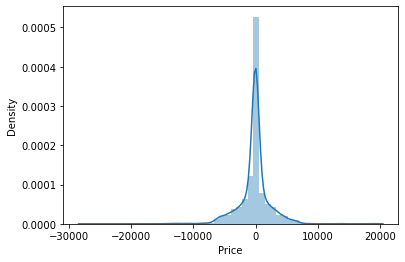

In [109]:
predict(DecisionTreeRegressor(), 0)

LinearRegression()


Training score : 0.6203899693394836
predictions are: 
 [12164.5395317  11553.93199956  8181.92164505 ...  4474.89293792
 14278.46372559  6176.72424036]


r2 score: 0.597312184638702
MAE: 2034.6186013309557
MSE: 7894530.254831817
RMSE: 2809.7206720298404


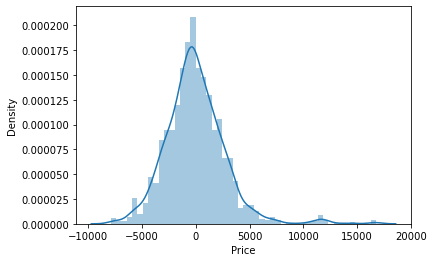

In [110]:
predict(LinearRegression(), 0)

#### Hyperparameter Tuning
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    
    2.Assign hyperparameters in form of dictionary
    3.Fit the model
    4.Check best paramters and best score

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

# Create the random grid
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

# Initialise your estimator
reg_rf=RandomForestRegressor()

In [114]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [115]:
# Random search of parameters, using 3 fold cross validation
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [116]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

RandomForestRegressor(max_depth=13, min_samples_split=10, n_estimators=540)


Training score : 0.9102863132401839
predictions are: 
 [11112.69447747 11981.60966945  6122.23960324 ...  3811.37192644
 12225.42822117  6457.41372687]


r2 score: 0.8569139215060921
MAE: 1110.5596012663561
MSE: 2805144.165342829
RMSE: 1674.8564611162442


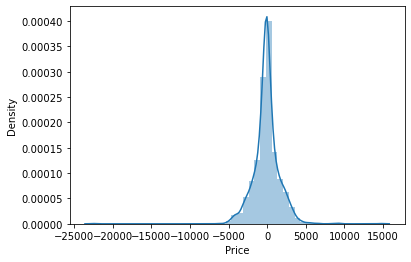

In [117]:
# Train using the best_params_ and save
predict(RandomForestRegressor(n_estimators=540 , min_samples_split= 10, max_features='auto' , max_depth=13 ),1)

> There is a slight improvement over ht previous r2_score

In [119]:
model=open('flight_model.pkl','rb')
forest=pickle.load(model)

In [120]:
y_prediction=forest.predict(X_test)

In [121]:
y_prediction

array([11112.69447747, 11981.60966945,  6122.23960324, ...,
        3811.37192644, 12225.42822117,  6457.41372687])

In [122]:
metrics.r2_score(y_test,y_prediction)

0.8569139215060921